In [10]:
import graphlab

# Load some house value vs. crime rate data

Dataset is from Philadelphia, PA and includes average house sales price in a number of neighborhoods. The attributes of each neighborhood we have, include the crime rate ('CrimeRate'), miles from Center City ('MilesPhila'), town name ('Name'), and county name ('County').


In [11]:
sales = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv/')

This non-commercial license of GraphLab Create is assigned to 1101071@eng.asu.edu.eg and will expire on April 10, 2017. For commercial licensing options, visit https://dato.com/buy/.


2016-04-16 12:02:57,441 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.5 started. Logging: C:\Users\Anwar\AppData\Local\Temp\graphlab_server_1460800970.log.0


Finished parsing file E:\Profession\Courses\Machine Learning\Projects\01-Regression\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.088086 secs.

------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[long,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Profession\Courses\Machine Learning\Projects\01-Regression\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.034023 secs.

In [12]:
sales


HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


# Exploring the data 

The house price in a town is correlated with the crime rate of that town. Low crime towns tend to be associated with higher house prices and vice versa.


In [5]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

# Creating Regression Model (x: CrimeRate, y:HousePrice)

In [13]:
crime_model = graphlab.linear_regression.create(sales, target='HousePrice', features=['CrimeRate'],
                                                validation_set=None,verbose=False)
#'linear_regression' class does all the job of getting the most convenient line for the given data
#now, our ML model is called 'crime_model'

# Now, let's see the line by using matplotlib

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline  
#used to plot in the same page, 'cause the default is to open a new tab.

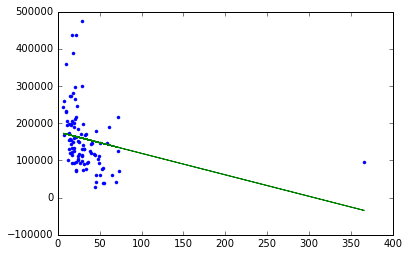

In [15]:
plt.plot(sales['CrimeRate'], sales['HousePrice'], '.',
        sales['CrimeRate'], crime_model.predict(sales), '-')

# Let's improve our model by neglecting some City Center houses.

In [16]:
sales_noCC = sales[sales['MilesPhila'] != 0]

In [17]:
sales_noCC.show(view = 'Scatter Plot', x='CrimeRate', y='HousePrice')

Canvas is accessible via web browser at the URL: http://localhost:58019/index.html
Opening Canvas in default web browser.


# Creating another Linear Regression Model (better)

In [18]:
crime_model_noCC = graphlab.linear_regression.create(sales_noCC, target='HousePrice', features=['CrimeRate'],
                                                validation_set=None,verbose=False)

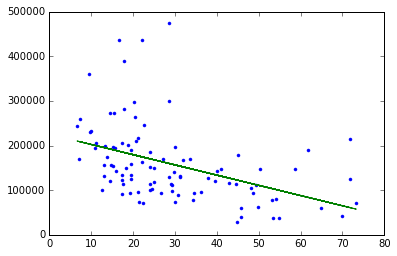

In [19]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
        sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

### comparing the coefficients of the two models

In [25]:
crime_model.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [26]:
crime_model_noCC.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


# Removing High Leverage Points 

In [28]:
sales_noHigh = sales_noCC[sales_noCC['HousePrice'] < 350000]
# here, we've got ride of the high leverage points on y-axis

In [29]:
#let's create a linear regerssion model
crime_model_noHigh = graphlab.linear_regression.create(sales_noHigh, target = 'HousePrice', features=['CrimeRate'],
                                                validation_set=None,verbose=False)

### comparing the new model with the second model

In [30]:
crime_model_noHigh.get('coefficients')

name,index,value,stderr
(intercept),None,199073.589615,11932.5101105
CrimeRate,None,-1837.71280989,351.519609333


you can see there's an influence on the model, but not that much